<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(_1_2)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-1.2_n20.csv',
 'data_add_delta_-1.2_n30.csv',
 'data_add_delta_-1.2_n60.csv',
 'data_add_delta_-1.2_n120.csv',
 'data_add_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-1.2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.442916,85.603269,-0.067844,174.978341,175.052362,-0.074021
1,0.0,1.0,21.021089,37.661017,-0.127834,68.554272,68.694121,-0.139849
2,0.0,2.0,78.933047,69.130350,-0.102527,157.960870,158.073680,-0.112811
3,0.0,3.0,88.212822,54.207787,0.004469,152.425078,152.435657,-0.010579
4,0.0,4.0,83.001189,96.468525,-0.086664,189.383050,189.473528,-0.090479
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.763521,34.609162,-0.072380,86.300303,86.375368,-0.075065
249996,999.0,246.0,21.746830,57.765714,0.093796,89.606340,89.506692,0.099649
249997,999.0,247.0,95.637847,53.015327,-0.008278,158.644896,158.661618,-0.016722
249998,999.0,248.0,82.939364,20.612286,-0.023078,113.528571,113.564722,-0.036151


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.442916,85.603269,-0.067844,174.978341,175.052362,-0.074021
1,0.0,1.0,21.021089,37.661017,-0.127834,68.554272,68.694121,-0.139849
2,0.0,2.0,78.933047,69.130350,-0.102527,157.960870,158.073680,-0.112811
3,0.0,3.0,88.212822,54.207787,0.004469,152.425078,152.435657,-0.010579
4,0.0,4.0,83.001189,96.468525,-0.086664,189.383050,189.473528,-0.090479
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.763521,34.609162,-0.072380,86.300303,86.375368,-0.075065
249996,999.0,246.0,21.746830,57.765714,0.093796,89.606340,89.506692,0.099649
249997,999.0,247.0,95.637847,53.015327,-0.008278,158.644896,158.661618,-0.016722
249998,999.0,248.0,82.939364,20.612286,-0.023078,113.528571,113.564722,-0.036151


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,79.442916,85.603269,-0.067844,174.978341,175.052362,-0.074021
1,0.0,1.0,21.021089,37.661017,-0.127834,68.554272,68.694121,-0.139849
2,0.0,2.0,78.933047,69.130350,-0.102527,157.960870,158.073680,-0.112811
3,0.0,3.0,88.212822,54.207787,0.004469,152.425078,152.435657,-0.010579
4,0.0,4.0,83.001189,96.468525,-0.086664,189.383050,189.473528,-0.090479
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,41.763521,34.609162,-0.072380,86.300303,86.375368,-0.075065
249996,999.0,246.0,21.746830,57.765714,0.093796,89.606340,89.506692,0.099649
249997,999.0,247.0,95.637847,53.015327,-0.008278,158.644896,158.661618,-0.016722
249998,999.0,248.0,82.939364,20.612286,-0.023078,113.528571,113.564722,-0.036151


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    79.442916  85.603269 -0.067844  174.978341  175.052362 -0.074021
      1.0    21.021089  37.661017 -0.127834   68.554272   68.694121 -0.139849
      2.0    78.933047  69.130350 -0.102527  157.960870  158.073680 -0.112811
      3.0    88.212822  54.207787  0.004469  152.425078  152.435657 -0.010579
      4.0    83.001189  96.468525 -0.086664  189.383050  189.473528 -0.090479
...                ...        ...       ...         ...         ...       ...
999.0 245.0  41.763521  34.609162 -0.072380   86.300303   86.375368 -0.075065
      246.0  21.746830  57.765714  0.093796   89.606340   89.506692  0.099649
      247.0  95.637847  53.015327 -0.008278  158.644896  158.661618 -0.016722
      248.0  82.939364  20.612286 -0.023078  113.528571  113.564722 -0.036151
      249.0  58.517032  82.141908 -0.060756  150.598184  150.654499 -0.056315

[250000 rows x 6 columns]

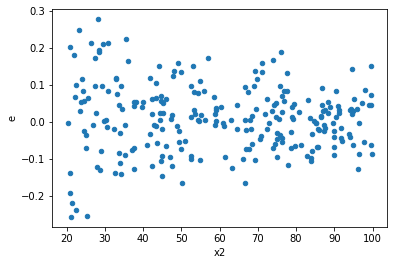

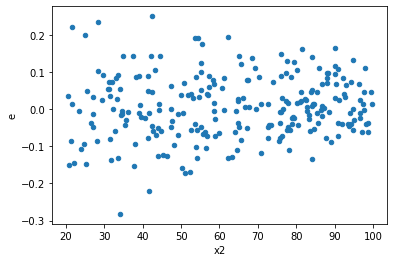

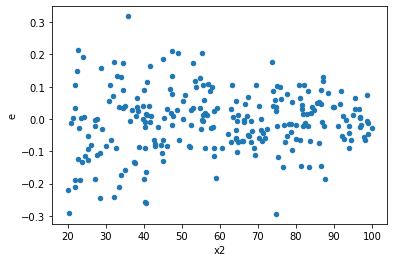

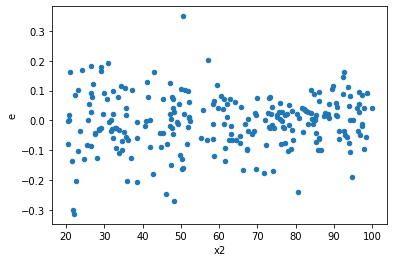

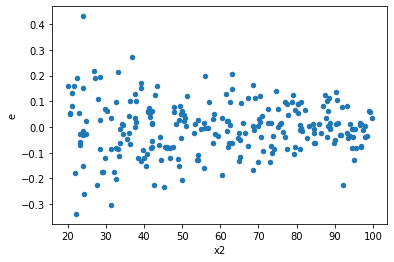

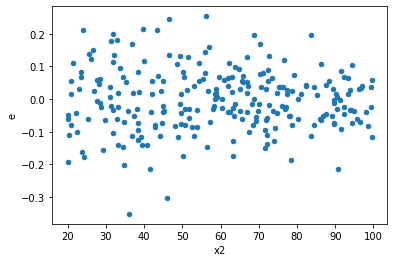

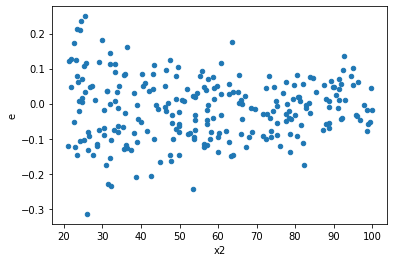

In [17]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[5.0]
tablenew5 = table.loc[6.0]
tablenew6 = table.loc[7.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

<ipython-input-14-7bd20896c3a8>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity'


,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
283.0,98.0,98.0,0.6469657034036285,0.7203168162277329,0.006601690851057433,0.00735017159416054,1.1133771271617814,0.596035045188493,0.7019824774057535,0.2980175225942465,Reject001=1 : Homoscedasticity
998.0,98.0,98.0,0.6108618323107088,0.6635993032470097,0.006233284003170498,0.006771421461704181,1.0863328958314693,0.6827049654021162,0.6586475172989419,0.3413524827010581,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,98.0,98.0,1.133443148310604,0.4987584459409485,0.011565746411332694,0.0050893718973566175,0.4400383439472439,6.383500823811395e-05,Reject001=0 : Heteroscedasticity
1.0,98.0,98.0,0.8195016865100734,0.4793396371320834,0.008362262107245647,0.004891220787062075,0.5849159861688598,0.008484646114676978,Reject001=0 : Heteroscedasticity
2.0,98.0,98.0,1.2877171250478168,0.6727678023685564,0.013139970663753232,0.0068649775751893505,0.5224499925351032,0.0014835095165299703,Reject001=0 : Heteroscedasticity
3.0,98.0,98.0,1.1766013363864583,0.653040044110623,0.012006136085576104,0.006663673919496153,0.555022354569322,0.003899416387338476,Reject001=0 : Heteroscedasticity
4.0,98.0,98.0,1.1496900556669536,0.8312769451214025,0.011731531180275036,0.00848241780736125,0.7230443901153564,0.11014100837721469,Reject001=1 : Homoscedasticity
5.0,98.0,98.0,1.6199542298624043,0.6103635063915808,0.016530145202677596,0.006228199044812048,0.376778241718239,2.261640685114105e-06,Reject001=0 : Heteroscedasticity
6.0,98.0,98.0,1.083000356803038,0.5749905140623061,0.011051024049010592,0.005867250143492919,0.5309236607822077,0.0019324830631861404,Reject001=0 : Heteroscedasticity
7.0,98.0,98.0,1.1091593961938853,0.3733115340502929,0.011317953022386584,0.0038093013678601314,0.3365715832470274,1.504879950639866e-07,Reject001=0 : Heteroscedasticity
8.0,98.0,98.0,1.011176343363731,0.5484332113708599,0.010318125952691133,0.005596257258886325,0.5423714814633301,0.002721602778361691,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    864
Reject001=1 : Homoscedasticity      136
Name: Result_test, dtype: int64